# Aula 07 - Exercício 06
## KNN e Métricas de avaliação
### Alunos:
 - Bruno Gomes Coelho       - 9791160
 - Bruno Mendes da Costa - 9779433
 

O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

- Notas:

  - **O dataset possui valores ausentes, representados por "?"**
  - A primeira variável do dataset é o ID de cada paciente. Essa variável **NÃO** deve ser utilizada no classificador 

---

- Carregue o dataset a partir do arquivo fornecido, substituindo os valores ausentes pela média dos valores daquela coluna. Utilize as classes `sklearn.impute.SimpleImputer` e a biblioteca `pandas`.

In [0]:
# Download do dataset
!wget https://raw.githubusercontent.com/BrunoxD/machineLearning/master/aula7/breast-cancer-wisconsin.data -qO breast-cancer-wisconsin.data

In [0]:
# Updating Seaborn
!pip3 install -qU seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
# Carregando o dataset e definindo "?" como valor nulo
df = pd.read_csv("breast-cancer-wisconsin.data", na_values="?")

# Retirando a coluna ID
df.drop(columns=['id'], inplace=True)

In [5]:
# Visualizando valor nulo como NaN
df[22:25]

,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
22,3,1,1,1,2,1.0,2,1,1,2
23,8,4,5,1,2,NaN,7,3,1,4
24,1,1,1,1,2,1.0,3,1,1,2


In [6]:
# Visualizações de medidas padrões como a média que será utilizada
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
u_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
u_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marg_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epi_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_chrom,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
norm_nucl,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [7]:
# Total de valores nulos
df.isna().sum().sum()

16

In [0]:
# Definindo a estratégia de remoção de valores nulos
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Retirando os valores nulos
df = pd.DataFrame(imp_mean.fit_transform(df), columns=df.columns)

In [9]:
# Verificamdo a nova quantidade de valores nulos
df.isna().sum().sum()

0

In [10]:
# Conferindo que os valores nulos foram substituidos pela média
df[22:25]

,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
22,3.0,1.0,1.0,1.0,2.0,1.000000,2.0,1.0,1.0,2.0
23,8.0,4.0,5.0,1.0,2.0,3.544656,7.0,3.0,1.0,4.0
24,1.0,1.0,1.0,1.0,2.0,1.000000,3.0,1.0,1.0,2.0




---
- Centralize e normalize os dados e separe 80% do conjunto para treino e 20% para testes. Faça uma divisão dos dados de maneira **estratificada**.

In [11]:
# Normalizando os dados
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df.head()

,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.706991,-0.179662,-0.611825,-0.343912,2.0
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.793513,-0.179662,-0.284112,-0.343912,2.0
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.429158,-0.179662,-0.611825,-0.343912,2.0
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.126510,-0.179662,1.354454,-0.343912,2.0
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.706991,-0.179662,-0.611825,-0.343912,2.0


In [0]:
%%capture
# Separando os dados de treino e de teste de maneira estratificada com 80% para treino
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['class']), df['class'], train_size=0.8,  stratify=df['class'])

In [13]:
# Checando se a divisão ficou correta
print([len(k) for k in [x_train, x_test, y_train, y_test]])
total = len(x_train)+len(x_test)
print(f"Treino: {len(x_train)/total}\nTeste: {len(x_test)/total}")

[559, 140, 559, 140]
Treino: 0.7997138769670958
Teste: 0.20028612303290416




---

- Faça classificação no conjunto de testes utilizando 4 classificadores KNN, com K=3 e 15 e p=1 e 2 (distância de Minkowski/Euclidiana). Para cada classificador, calcule e exiba a matriz de confusão bem como a acurácia do classificador. **Para calcular a acurácia, utilize APENAS a matriz de confusão.**

In [0]:
# Aplica o KNN nos parâmetros especificados e imprime seus resultados
def KNN(K, p, x_train, x_test, y_train, y_test):
  # Treinando o modelo
  model = KNeighborsClassifier(n_neighbors=K, p=p)
  model.fit(x_train.values, y_train) 
  # Realizando a predição
  y_pred = model.predict(x_test)    
  
  # Gerando a matriz de confusão
  mat = confusion_matrix(y_test, y_pred)  
  VN, FP, FN, VP = mat.ravel()
  
  # Calculando a acurácia
  acc = (VP + VN)/(VN + FP + FN + VP)
    
  # Imprimindo a matriz de confusão
  plot_confusion_matrix(mat)  
  
  #print(f"VN={VN}\nFP={FP}\nFN={FN}\nVP={VP}")
  print(f"Classificador KNN com K={K} e p={p}, acurácia: {acc}.")
  print()

In [0]:
# Fonte: https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
def plot_confusion_matrix(cm):
  plt.clf()  
  plt.grid(False)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
  classNames = ['Negativo', 'Positivo']
  plt.title('Matriz de Confusão')
  plt.ylabel('Classe Real')
  plt.xlabel('Classe Predita')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['VN','FP'], ['FN', 'VP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

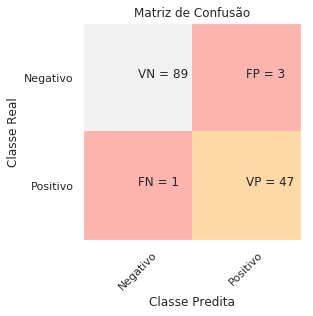

Classificador KNN com K=3 e p=1, acurácia: 0.9714285714285714.



In [16]:
KNN(3, 1, x_train, x_test, y_train, y_test)


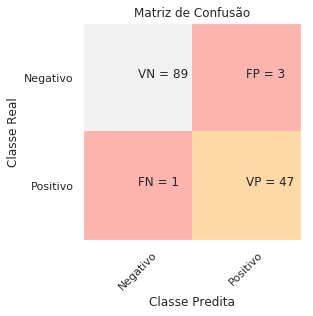

Classificador KNN com K=3 e p=2, acurácia: 0.9714285714285714.



In [17]:
KNN(3, 2, x_train, x_test, y_train, y_test)


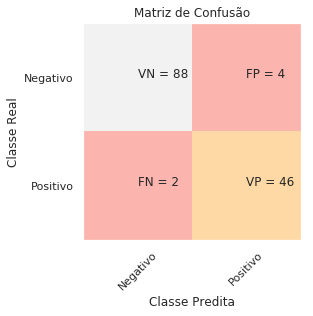

Classificador KNN com K=15 e p=1, acurácia: 0.9571428571428572.



In [18]:
KNN(15, 1, x_train, x_test, y_train, y_test)


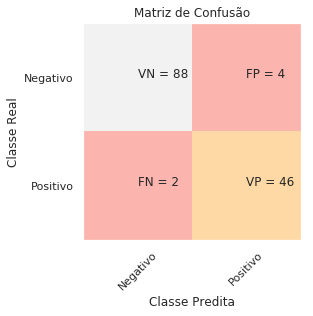

Classificador KNN com K=15 e p=2, acurácia: 0.9571428571428572.



In [19]:
KNN(15, 2, x_train, x_test, y_train, y_test)



---
Agora vamos analisar um problema de classificação não binário. Para isso, vamos utilizar o conjunto Iris. Repetindo os passos anteriores:
- Carregue o conjunto Iris
- Centralize e normalize os dados
- Separe o conjunto, de maneira **NÃO** estratificada, em 50% treino e 50% teste (a ideia é que o classificador tenha um erro maior)
- Utilize um classificador KNN com K=1 para predizer o conjunto de teste. Essa predição será utilizado posteriormente.


In [0]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)
data = load_iris()

In [0]:
# Normalizando os dados
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [0]:
%%capture
# Separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.5)

In [0]:
# KNN para K=1 e p padrão
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)   



---

- Mostre a matriz de confusão do conjunto de teste e em seguida, para cada variável do conjunto, mostre sua matriz de confusão binária.
  - Dica: Pesquise sobre o método `numpy.delete`

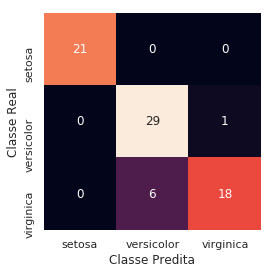

In [24]:
var = []
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real');

Variável 1 - Setosa


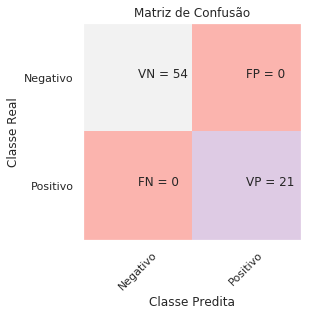

In [25]:
# Variável 1 - Setosa
mat1 = np.copy(mat)

# Coluna 1 = Coluna 1 + Coluna 2
mat1[:,1] = mat[:,1] + mat[:,2]
# Linha 1 = Linha 1 + Linha 2
mat1[1,:] = mat1[1,:] + mat1[2, :]
# Deleta a Linha 2
mat1 = np.delete(mat1, 2, 0)
# Deleta a Coluna 2
mat1 = np.delete(mat1, 2, 1)

# Obtém VP, FP, FN, VN da matriz
VP = mat1[0,0]
FP = mat1[0,1]
FN = mat1[1,0]
VN = mat1[1,1]

# Imprime a matriz de confusão binária
print("Variável 1 - Setosa")
plot_confusion_matrix(np.array([VN, FP, FN, VP]).reshape(2,2))

var.append([VP, FP, FN, VN])

Variável 2 - Versicolor


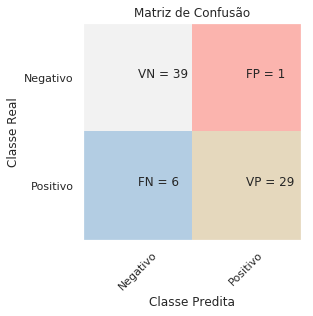

In [26]:
# Variável 2 - Versicolor
mat2 = np.copy(mat)

# Coluna 2 = Coluna 0 + Coluna 2
mat2[:,2] = mat[:,0] + mat[:,2]
# Linha 2 = Linha 0 + Linha 2
mat2[2,:] = mat2[0,:] + mat2[2, :]
# Deleta a Linha 0 
mat2 = np.delete(mat2, 0, 0)
# Deleta a Coluna 0 
mat2 = np.delete(mat2, 0, 1)

# Obtém VP, FP, FN, VN da matriz
VP = mat2[0,0]
FP = mat2[0,1]
FN = mat2[1,0]
VN = mat2[1,1]

# Imprime a matriz de confusão binária
print("Variável 2 - Versicolor")
plot_confusion_matrix(np.array([VN, FP, FN, VP]).reshape(2,2))

var.append([VP, FP, FN, VN])

Variável 3 - Virginica


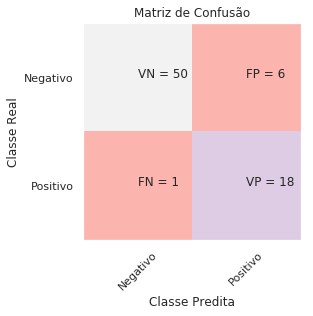

In [27]:
# Variável 3 - Virginica
mat3 = np.copy(mat)

# Coluna 1 = Coluna 0 + Coluna 1
mat3[:,1] = mat[:,0] + mat[:,1]
# Linha 1 = Linha 0 + Linha 1
mat3[1,:] = mat3[0,:] + mat3[1, :]
# Deleta a Linha 0 
mat3 = np.delete(mat3, 0, 0)
# Deleta a Coluna 0
mat3 = np.delete(mat3, 0, 1)

# Obtém VP, FP, FN, VN da matriz
VP = mat3[1,1]
FP = mat3[1,0]
FN = mat3[0,1]
VN = mat3[0,0]

# Imprime a matriz de confusão binária
print("Variável 3 - Virginica")
plot_confusion_matrix(np.array([VN, FP, FN, VP]).reshape(2,2))

var.append([VP, FP, FN, VN])



---

- Utilizando as matrizes de confusão binárias calculadas acima, calcule o **Recall** e **Precisão** de cada variável do conjunto.
  - Dica 1: Lembre-se que ao calcular a matriz de confusão binária para cada classe, obtemos os valores VP, FP, FN e VN.
  - Dica 2: Lembre-se que Recall é calculado por $\frac{VP}{VP+FN}$ e Precisão por  $\frac{VP}{VP+FP}$.

In [0]:
# Precision
def precision(VP, FP, FN, VN):
  return (VP)/(VP+FP)

# Recall
def recall(VP, FP, FN, VN):
  return (VP)/(VP+FN) 

In [0]:
def display(i, var, VP, FP, FN, VN):
  print(f"Variável {i}: {var.capitalize()}")
  print(f"Recall {recall(VP, FP, FN, VN)}")
  print(f"Precision {precision(VP, FP, FN, VN)}")
  print()

In [30]:
for i in range(3):
  display(i, data.target_names[i], var[i][0], var[i][1], var[i][2], var[i][3])

Variável 0: Setosa
Recall 1.0
Precision 1.0

Variável 1: Versicolor
Recall 0.8285714285714286
Precision 0.9666666666666667

Variável 2: Virginica
Recall 0.9473684210526315
Precision 0.75





---
Considere o conjunto de dados abaixo, onde são representados um conjunto de $n$ pontos que podem ser classificados em duas classes: verde ou azul. **Todo** o conjunto pode ser visto na imagem abaixo. O ponto preto $q$ é um ponto de consulta, cuja classe é desconhecida. Suponha que foi usado um classificador do tipo KNN com distância euclidiana para classificar esse ponto.


![](https://drive.google.com/uc?export=download&id=1WuZT3F8BT6CSOoUd1WlAnQCKzcaxORNh)


- Qual a saída desse classificador para K=3?

O resultado desse classificador para o KNN com K=3 será a classe azul.



---

- E para K=9?

O resultado desse classificador para o KNN com K=9 será a classe verde.



---

 - E para o caso extremo de K=$n$? A posição de $q$ no espaço interfere nesse resultado? Justifique.

Em um caso extremo de K, em que K >= 7 para este dataset,  independente da posição de $q$ o resultado convergirá para a classe majoritária no conjunto de dados, portanto o resultado do classificador também será verde.